In [1]:
import os
import json
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd

import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.feature as cf

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings('ignore')

In [2]:
cor = 'spearman'
npix = 2
acf = 'mar'
yy_s, yy_e = 2002, 2023

In [3]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','Satellite','5_DOWN')

In [4]:
veneto_dir = os.path.join('/','media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    ITALY = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

## CMORPH

In [5]:
# data_dir = os.path.join(dir_base, f'ITALY_DOWN_CMORPH_3h_2002_2023_npix_2_thr_1_acf_mar_genetic_{cor}.nc')
data_dir = os.path.join(dir_base, f'ITALY_DOWN_CMORPH_3h_{yy_s}_{yy_e}_npix_{npix}_thr_1_acf_{acf}_genetic_pearson_corrected.nc')
DATA = xr.open_dataset(data_dir)

lon2d_CM, lat2d_CM = np.meshgrid(DATA.lon.values, DATA.lat.values)

Tr = DATA.Tr.values

CM_BETA = DATA.BETA.values
CM_GAMMA = DATA.GAMMA.values

CM_Mevs = DATA.Mev_s.values
CM_Mevd = DATA.Mev_d.values

In [6]:
data_dir = os.path.join(dir_base, f'ITALY_DOWN_CMORPH_3h_{yy_s}_{yy_e}_npix_{npix}_thr_1_acf_{acf}_genetic_{cor}.nc')
DATA = xr.open_dataset(data_dir)

CM_Mevd_spearman = DATA.Mev_d.values

Text(0.0, 1.0, '(b) Down-Quantiles Spearman')

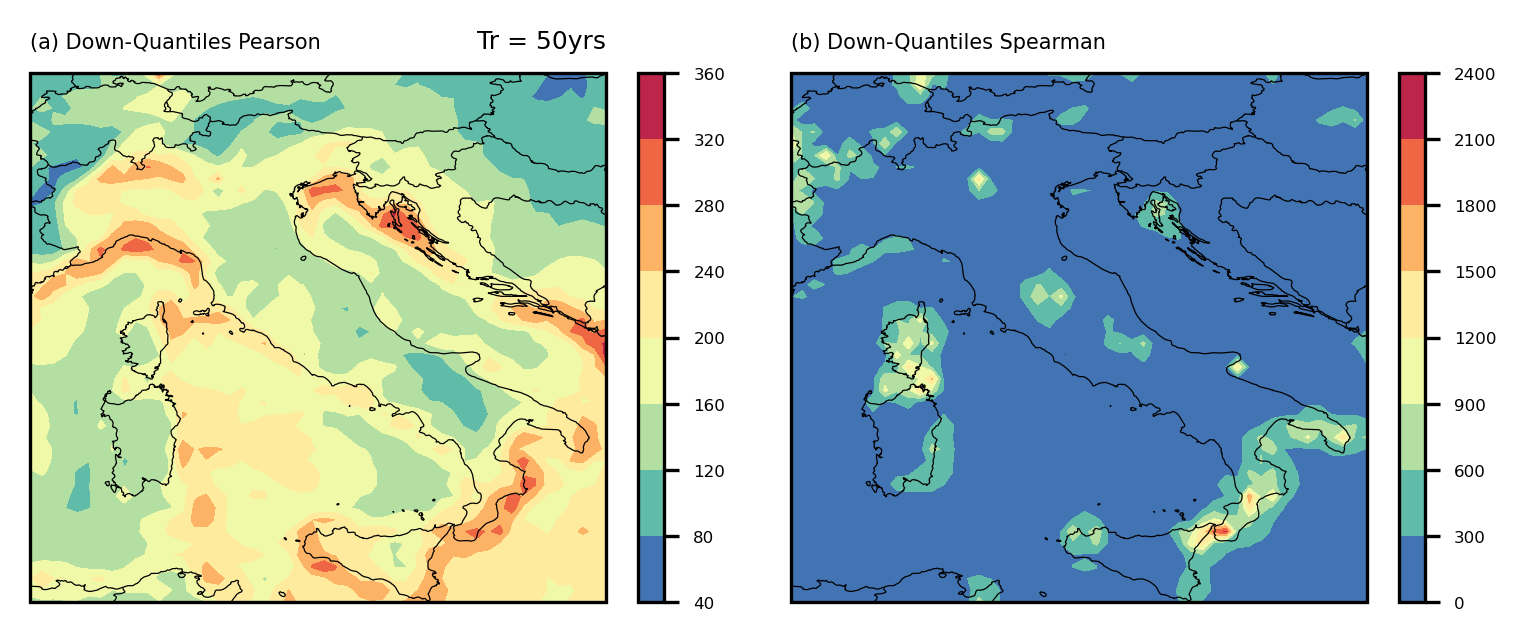

In [7]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(6,3),dpi=300)
gs = gridspec.GridSpec(1,2)

# ==============================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(lon2d_CM, lat2d_CM, CM_Mevd[3,:,:],cmap=cmap, levels=None)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.0417)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(a) Down-Quantiles Pearson', fontsize=5, loc='left')
ax1.set_title('Tr = 50yrs', fontsize=6, loc='right')

# ==============================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(lon2d_CM, lat2d_CM, CM_Mevd_spearman[3,:,:],cmap=cmap, levels=None)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.0417)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(b) Down-Quantiles Spearman', fontsize=5, loc='left')


## ERA5

In [8]:
data_dir = os.path.join(dir_base, f'ITALY_DOWN_ERA5_3h_{yy_s}_{yy_e}_npix_{npix}_thr_1_acf_{acf}_genetic_{cor}.nc')
DATA = xr.open_dataset(data_dir)

lon2d_ER, lat2d_ER = np.meshgrid(DATA.lon.values, DATA.lat.values)

ER_BETA = DATA.BETA.values
ER_GAMMA = DATA.GAMMA.values

ER_Mevs = DATA.Mev_s.values
ER_Mevd = DATA.Mev_d.values

# Plot

In [31]:
tr_pos = 3

In [33]:
Mev_min = min(np.nanmin(CM_Mevs[tr_pos,:,:]), np.nanmin(ER_Mevs[tr_pos,:,:]))
Mev_max = max(np.nanmax(CM_Mevs[tr_pos,:,:]), np.nanmax(ER_Mevs[tr_pos,:,:]))
Mev_min = np.floor(Mev_min * 10) / 10
Mev_max = np.ceil(Mev_max * 10) / 10
print(f"Mev_min: {Mev_min}, Mev_max: {Mev_max}")
Mev_range = np.arange(Mev_min, Mev_max, 40)

Med_min = min(np.nanmin(CM_Mevd[tr_pos,:,:]), np.nanmin(ER_Mevd[tr_pos,:,:]))
Med_max = max(np.nanmax(CM_Mevd[tr_pos,:,:]), np.nanmax(ER_Mevd[tr_pos,:,:]))
Med_min = np.floor(Med_min * 10) / 10
Med_max = np.ceil(Med_max * 10) / 10
print(f"Med_min: {Med_min}, Med_max: {Med_max}")
Med_range = np.arange(Med_min, 500, 40)

Mev_min: 52.9, Mev_max: 305.1
Med_min: 54.3, Med_max: 410.2


Text(0.0, 1.0, 'ERA5 Down Quantiles')

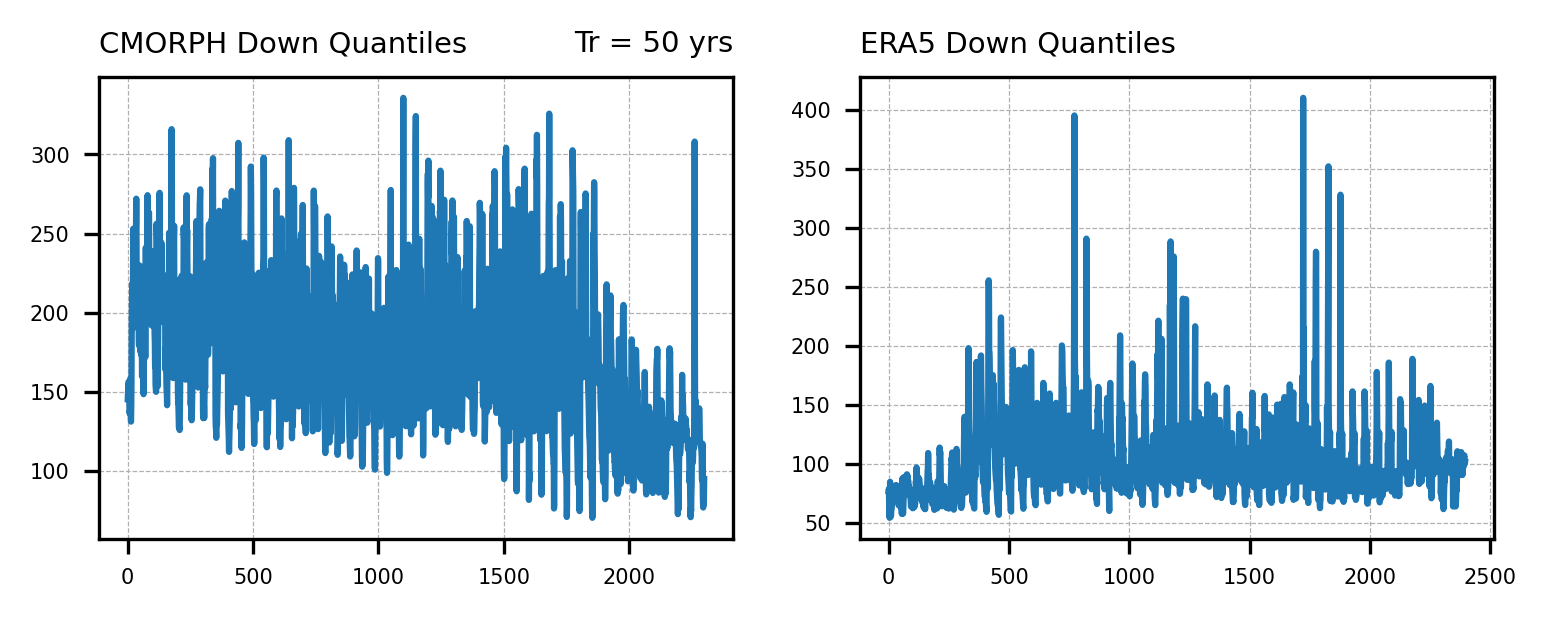

In [37]:
fig = plt.figure(figsize=(6,2),dpi=300)
gs = gridspec.GridSpec(1,2)

# ==============================================================================
ax1 = plt.subplot(gs[0, 0])
ax1.plot(CM_Mevd[tr_pos,:,:].flatten())
ax1.tick_params(axis='both', which='major', labelsize=5)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_title(f'CMORPH Down Quantiles', fontsize=7, loc='left')
ax1.set_title(f'Tr = {Tr[tr_pos]} yrs', fontsize=7, loc='right')

# ==============================================================================
ax1 = plt.subplot(gs[0, 1])
ax1.plot(ER_Mevd[tr_pos,:,:].flatten())
ax1.tick_params(axis='both', which='major', labelsize=5)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_title('ERA5 Down Quantiles', fontsize=7, loc='left')

In [38]:
# ER_Mevd[ER_Mevd==np.nanmax(ER_Mevd)] = np.nan

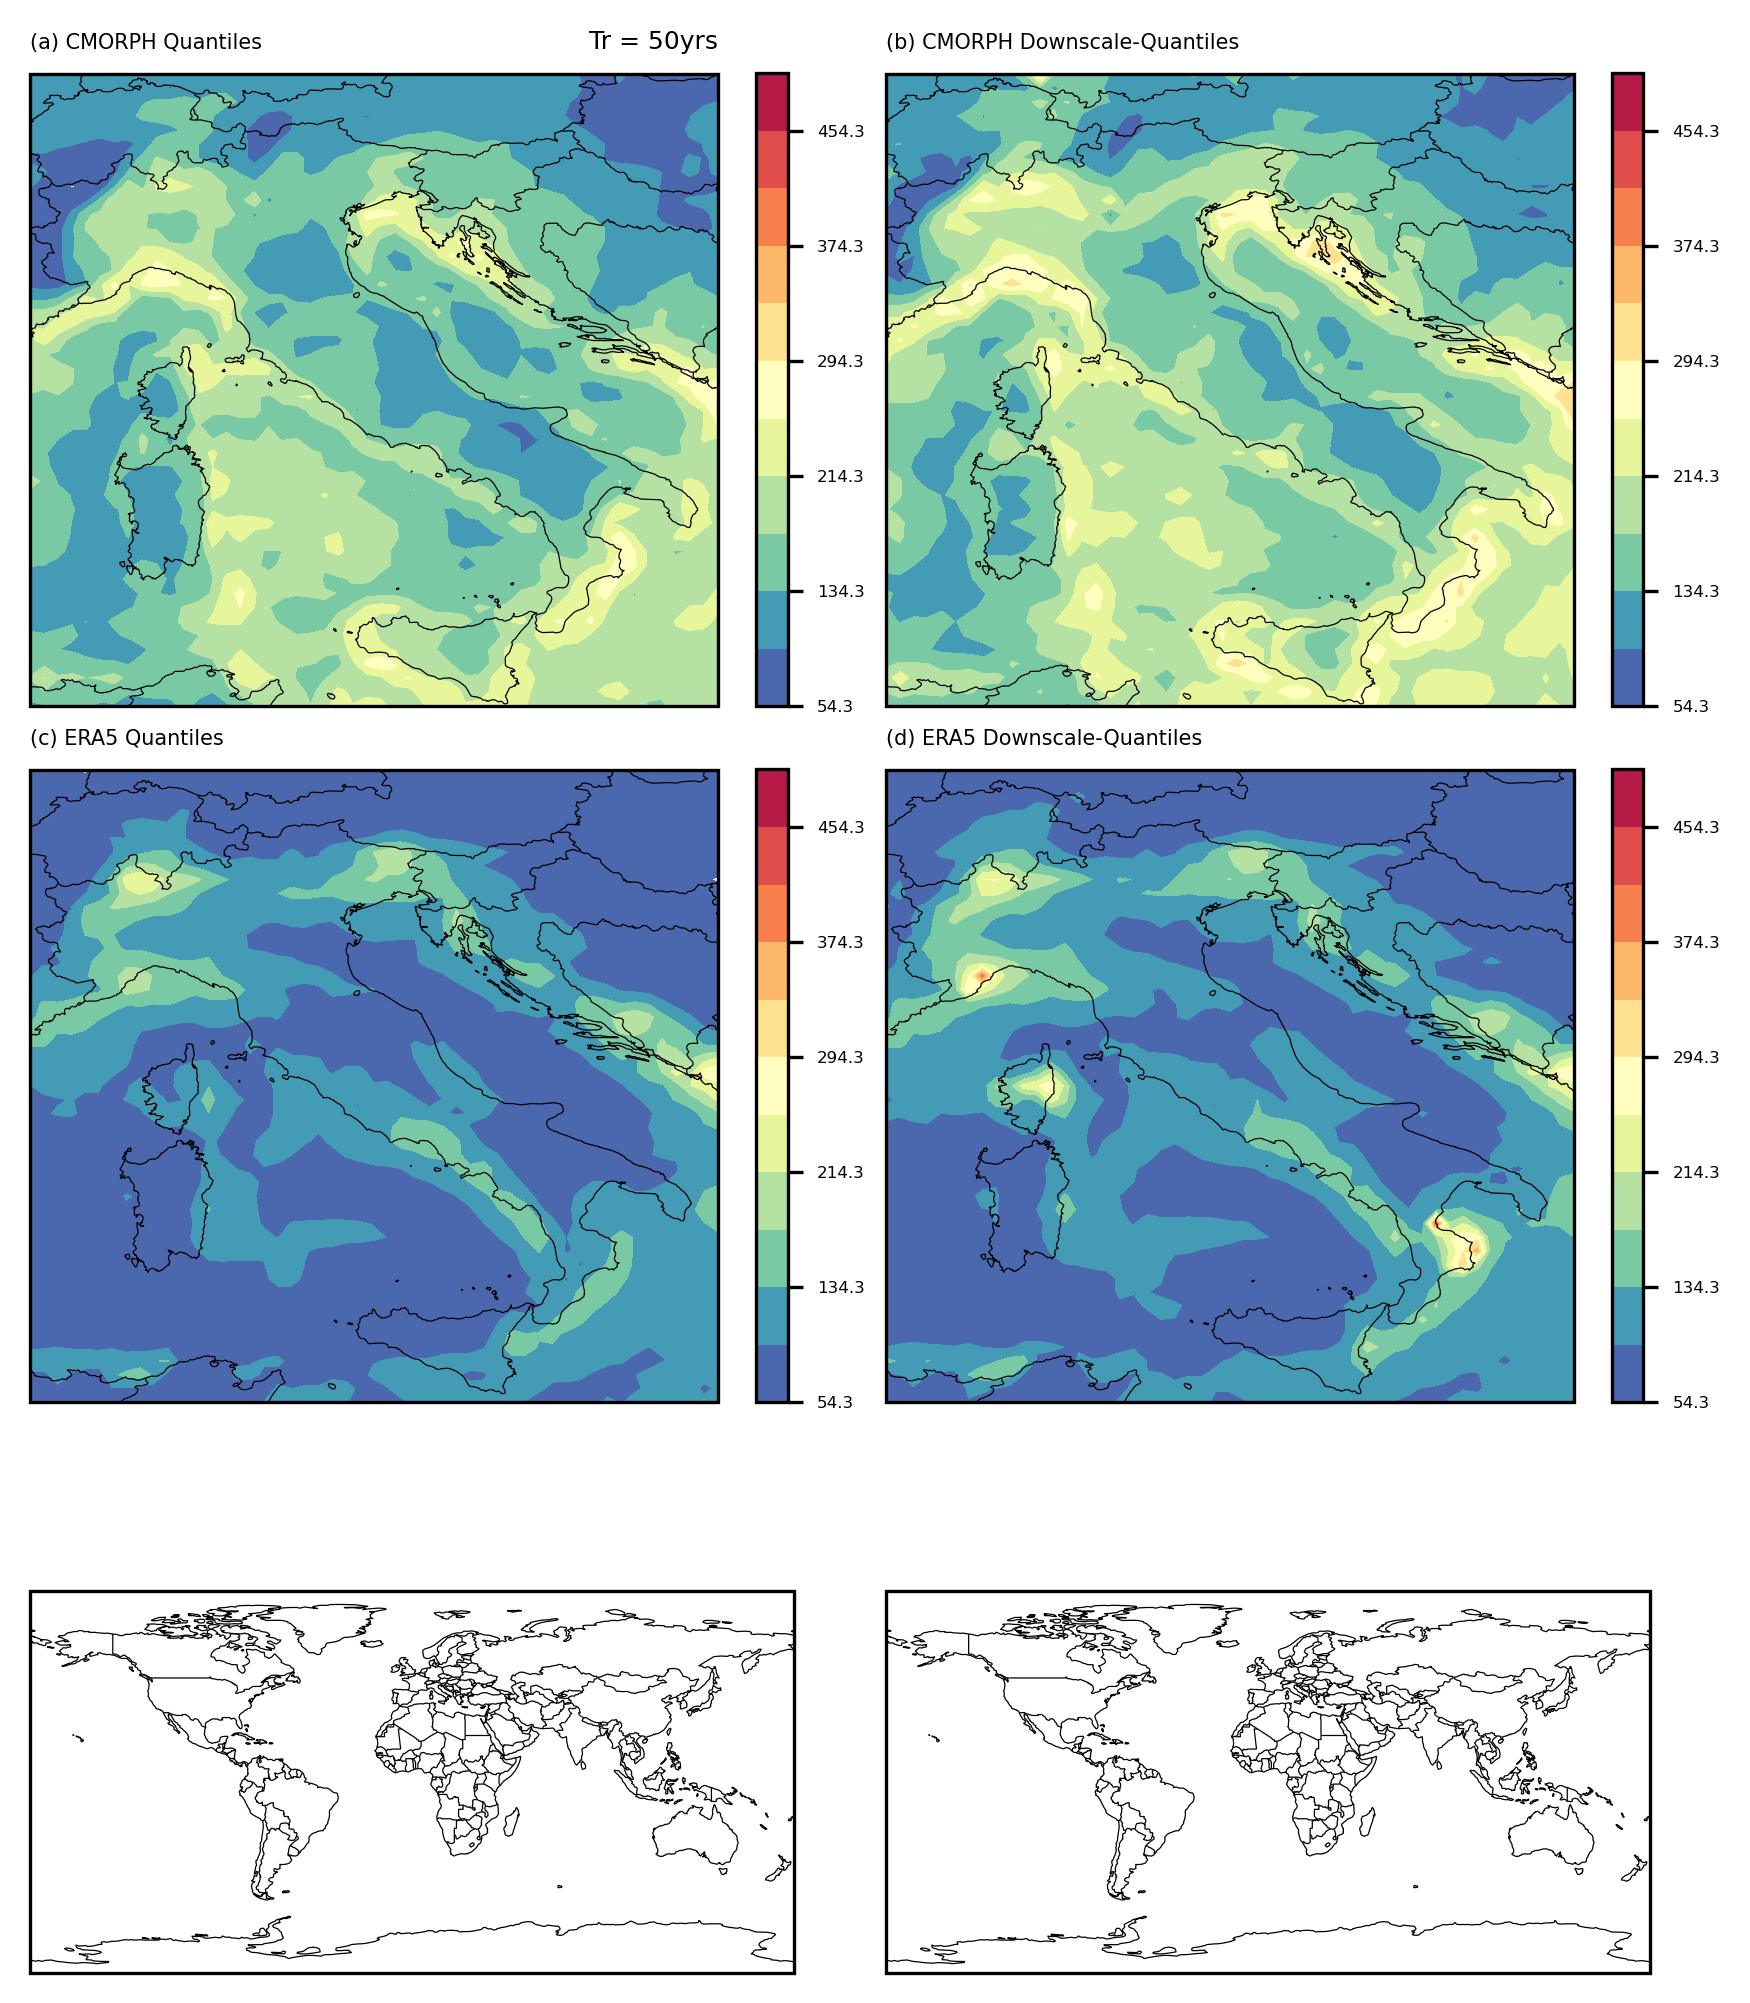

In [40]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(6,7.5),dpi=300)
gs = gridspec.GridSpec(3,2)

# ==============================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(lon2d_CM, lat2d_CM, CM_Mevs[tr_pos,:,:],cmap=cmap, levels=Med_range)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.05)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(a) CMORPH Quantiles', fontsize=5, loc='left')
ax1.set_title(f'Tr = {Tr[tr_pos]}yrs', fontsize=6, loc='right')

# ==============================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(lon2d_CM, lat2d_CM, CM_Mevd[tr_pos,:,:],cmap=cmap, levels=Med_range)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.05)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(b) CMORPH Downscale-Quantiles', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(lon2d_ER, lat2d_ER, ER_Mevs[tr_pos,:,:],cmap=cmap, levels=Med_range)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.05)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(c) ERA5 Quantiles', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[1, 1], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(lon2d_ER, lat2d_ER, ER_Mevd[tr_pos,:,:],cmap=cmap, levels=Med_range)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.05)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(d) ERA5 Downscale-Quantiles', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[2, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)

# ==============================================================================
ax1 = plt.subplot(gs[2, 1], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)

# ==============================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.12, hspace=0.1)

In [12]:
BET_min = min(np.nanmin(CM_BETA), np.nanmin(ER_BETA))
BET_max = max(np.nanmax(CM_BETA), np.nanmax(ER_BETA))
BET_min = np.floor(BET_min * 10) / 10
BET_max = np.ceil(BET_max * 10) / 10
BET_range = np.arange(BET_min, BET_max+0.1, 0.1)

GAM_min = min(np.nanmin(CM_GAMMA), np.nanmin(ER_GAMMA))
GAM_max = max(np.nanmax(CM_GAMMA), np.nanmax(ER_GAMMA))
GAM_min = np.floor(GAM_min * 10) / 10
GAM_max = np.ceil(GAM_max * 10) / 10
GAM_range = np.arange(GAM_min, GAM_max+0.1, 0.1)

In [13]:
# Remove CMORPH maximum BETA value
# CM_BETA[CM_BETA>=1.38] = 1.38

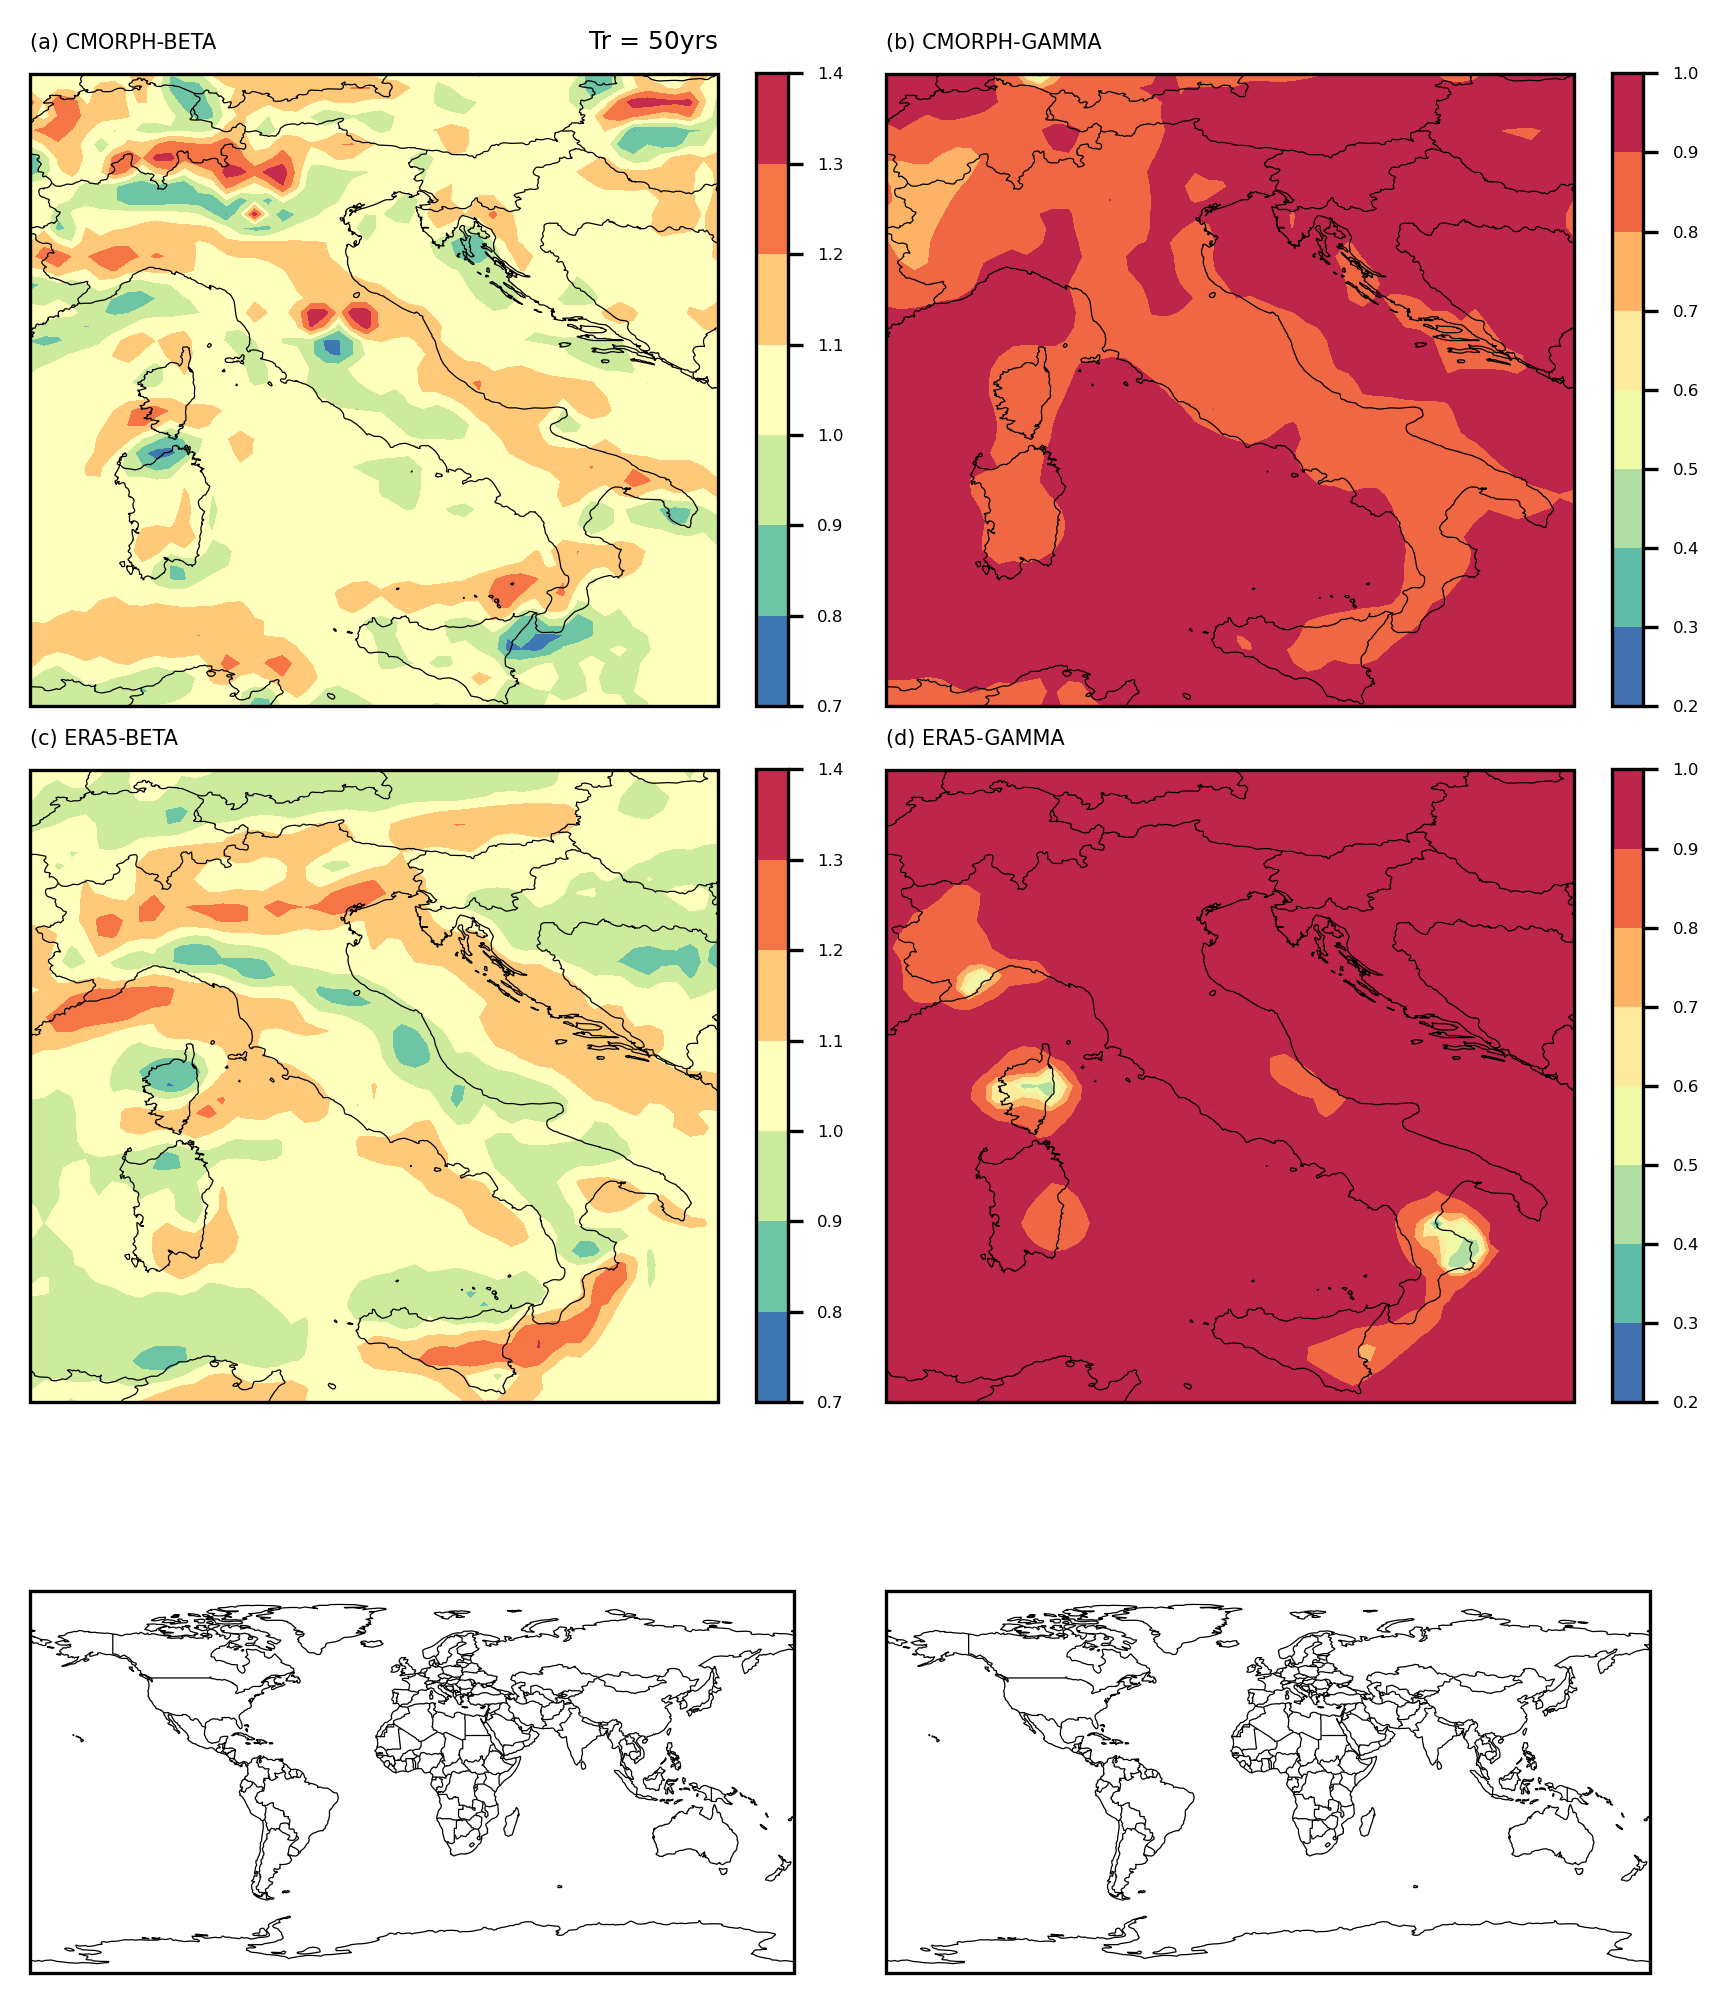

In [14]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(6,7.5),dpi=300)
gs = gridspec.GridSpec(3,2)

# ==============================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(lon2d_CM, lat2d_CM, CM_BETA,cmap=cmap, levels=BET_range)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.05)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(a) CMORPH-BETA', fontsize=5, loc='left')
ax1.set_title('Tr = 50yrs', fontsize=6, loc='right')

# ==============================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(lon2d_CM, lat2d_CM, CM_GAMMA,cmap=cmap, levels=GAM_range)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.05)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(b) CMORPH-GAMMA', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(lon2d_ER, lat2d_ER, ER_BETA,cmap=cmap, levels=BET_range)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.05)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(c) ERA5-BETA', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[1, 1], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(lon2d_ER, lat2d_ER, ER_GAMMA,cmap=cmap, levels=GAM_range)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.05)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(d) ERA5-GAMMA', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[2, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)

# ==============================================================================
ax1 = plt.subplot(gs[2, 1], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)

# ==============================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.12, hspace=0.1)